# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [1]:
#your import cell
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

import math
import scipy.integrate

Now we can define our integration algorithms

In [2]:
#define midpoint rule
def f(x):
    return(x**2)

def midpoint_rule(n,x_1,x_2,f):
    dx = (x_2 - x_1)/n
    A = 0
    for i in range(n):
        A = A + f(x_1 + dx*(1/2+i))*dx
    return(A)
        
midpoint_rule(100,0,1,f)        

0.33332500000000004

In [3]:
#define trapazoidal rule
def trap_rule(n,x_1,x_2,f):
    dx = (x_2 -x_1)/n
    A = 0
    for i in range(n):
        A = A + .5*(f(x_1+i*dx)+f(x_1+(i+1)*dx))*dx
    return(A)
trap_rule(100,0,1,f)    

0.33335

In [26]:
#define simpson's rule
def simps_rule(n,x_1,x_2,f):
    dx = (x_2-x_1)/n
    
    A = (dx/3)*(x_1)
    B = 4
    
    for i in range(n):
        if(i != n-1):
            A = A +(dx/3)* B * f(x_1 + (i+1)*dx)
        else:
            A = A + (dx/3)*f(x_1 + (i+1)*dx)
            
        if (B == 4):
            B = 2
        else:
            B = 4
            
            
    return(A)


simps_rule(100,0,1,f)

0.3333333333333334

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [5]:
#exact solution to the integral
# exact_solution = .5 * sin(pi/4)
# approximately = 0.353553390593273762200422181052424519642417968844237018294

In [28]:
#solve the integral using your integration functions
func = lambda x: 2/((4+x**2)**(3/2))

a =midpoint_rule(6,0,2,func)
b =trap_rule(6,0,2,func)
c =simps_rule(6,0,2,func)
print("Midpoint rule:",a)
print("Trapezoid rule:",b)
print("Simpson's rule:",c)

Midpoint rule: 0.3538599754585315
Trapezoid rule: 0.35293994641413146
Simpson's rule: 0.3257740128466715


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [15]:
from scipy.integrate import trapz
def f(x):
    return(x**2)
x = np.linspace(0,2,6)

y = np.zeros(6)
for i in range(6):
    y[i] = func(x[i])
func = lambda x: 2/((4+x**2)**(3/2))

#print(y[5],x[5])

In [16]:
from scipy.integrate import trapz, simps
print("Scipy trapz method:",trapz(y,x))
print("Scipy Simspon's method:",simps(y,x))

Scipy trapz method: 0.3526702692186624
Scipy Simspon's method: 0.3532157038993122


# Question
How do scipy integrals compare to yours? Support your answer. 

Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [29]:
def error(a):
    e = 0.353553390593273762200422181052424519642417968844237018294 #exact value
    return((a - e)/e)

print("Midpoint rule:",error(0.3538599754585315))
print("Trapezoid rule:",error(0.35293994641413146))
print("Simpson's rule:",error(0.3257740128466715))
print("Scipy trapz method:",error(0.3526702692186624))
print("Scipy Simspon's method:",error(0.3532157038993122))

Midpoint rule: 0.0008671529489315273
Trapezoid rule: -0.0017350821558038288
Simpson's rule: -0.07857194552706057
Scipy trapz method: -0.0024978444503939803
Scipy Simspon's method: -0.0009551222048668947


# Question
Which method provides the best approximation to the exact solution?

The midpoint rule found the best approximation with a close second from the scipy trapz method.

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

<IPython.core.display.Javascript object>


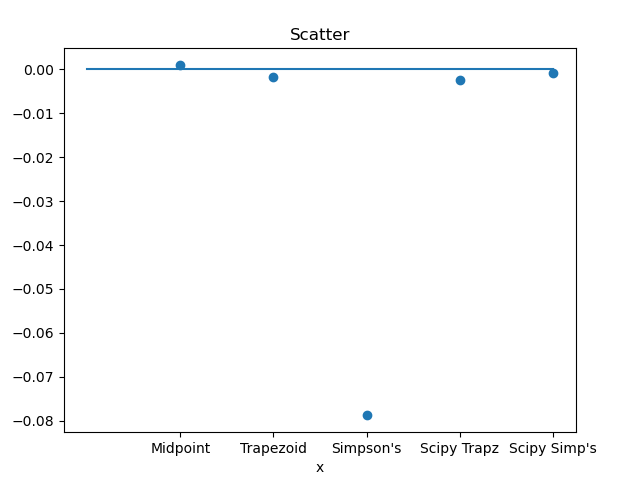

Text(0.5, 1.0, 'Scatter')

In [31]:
#plot
y_ = [0.0008671529489315273,-0.0017350821558038288,-0.07857194552706057,-0.0024978444503939803,-0.0009551222048668947]
x_ = ["Midpoint","Trapezoid","Simpson's","Scipy Trapz","Scipy Simp's"]

w = np.arange(-1,5)
z = np.zeros(6)


fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.scatter(x_,y_,marker='o')
ax.plot(w,z)
ax.set_xlabel('x')
ax.set_title('Scatter')

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [55]:
#solve integral above
from scipy.integrate import quad

func2 = lambda x: np.exp(1)**(-x**2)

quad(func2,-900,900)


(1.7724538509055157, 1.5058058204759897e-09)

# Question
If you square your solution, does the resulting number have any special meaning?

In [56]:
1.7724538509055157**2

3.141592653589792

Pi!
